# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [43]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [44]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

print(X)
print(Y)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
[  1.93405968   3.0944645    5.94536872   7.42963199   9.39545765
  10.43217899  13.95254891  14.01246051  16.50596472  18.86958306
  21.55876584  22.39537015  25.72598647  27.96680135  28.32768448
  31.19466789  32.0179722   34.77314257  36.08832012  39.91330594
  40.87229329  43.89795461  45.57261197  47.7325786   48.34633084
  50.14989717  53.20148544  54.33594437  57.46676034  58.81688772
  61.05581765  63.87514317  65.04339224  66.21638677  68.31644681
  71.0904053   73.04880816  75.27522049  76.80299089  79.29961022
  80.79380001  83.24783223  85.53480993  86.35794782  88.75115154
  91.00506612  93.37333416  94.5073593   97.10948173  99.24986169
 101.79100233 102.72570718 105.27511415 106.3828928  108.99558823
 110.36489081 113.83676608 114.86364414 117.6603762  118.833

---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [55]:
# YOUR CODE HERE
import numpy as np

def add_bias_column(X):
    # Reshape X to 2D array with shape (num_examples, 1)
    X = X.reshape(-1, 1)
    # Concatenate a column of 1s
    print(X.shape[0])
    print(X[:10])
    X_new = np.c_[np.ones(X.shape[0]), X]
    # [70,] [70, 1]
    
    return X_new

# Add the bias column to X
X_with_bias = add_bias_column(X)
print(X_with_bias[:10])

# Print the shape of the new array
print('Shape of X with bias column:', X_with_bias.shape)

# Print the first 10 rows of X_with_bias to verify
print('\nFirst 10 rows of X with bias column:\n', X_with_bias[:10])

70
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
Shape of X with bias column: (70, 2)

First 10 rows of X with bias column:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [15]:
# YOUR CODE HERE
# Using train_test_split to split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_with_bias, Y, test_size=0.2, random_state=1234)

# Printing the shape of each array
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (56, 2)
Shape of X_test: (14, 2)
Shape of Y_train: (56,)
Shape of Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

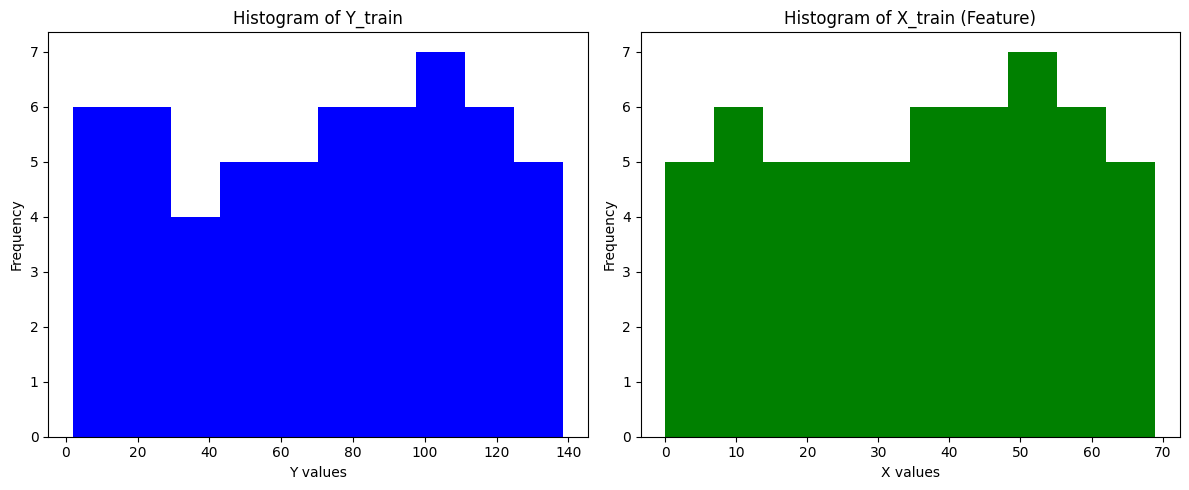

In [20]:
# YOUR CODE HERE
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Plot histogram for Y_train on the left
plt.subplot(1, 2, 1)
plt.hist(Y_train, color='blue')
plt.title('Histogram of Y_train')
plt.xlabel('Y values')
plt.ylabel('Frequency')

# Plot histogram for X_train (second column) on the right
plt.subplot(1, 2, 2)
plt.hist(X_train[:, 1], color='green')
plt.title('Histogram of X_train (Feature)')
plt.xlabel('X values')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjusts the layout so the subplots do not overlap
plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [68]:
# YOUR CODE HERE
import numpy as np

# Define the parameters (weights) for M1 and M2
# M1: 5 + x -> [5, 1] (where 5 is the intercept, 1 is the coefficient for x)
# M2: 1 + 2x -> [1, 2] (where 1 is the intercept, 2 is the coefficient for x)
weights_M1 = np.array([5, 1])
weights_M2 = np.array([1, 2])

print(X_train[:10])
print(X_train.shape)
print(weights_M1)
print(weights_M1.shape)

# Use np.dot for matrix multiplication to calculate the predictions
# X_train contains two columns: the first is bias (1s) and the second is the actual feature values
M1_hat_train = np.dot(X_train, weights_M1)
M2_hat_train = np.dot(X_train, weights_M2)

#print(X_train[:10])
#print(weights_M1)
print(M1_hat_train[:10])

# Print the shapes of the predictions and compare them with Y_train
print('Shape of M1_hat_train:', M1_hat_train.shape)
print('Shape of M2_hat_train:', M2_hat_train.shape)
print('Shape of Y_train:', Y_train.shape)

# Optionally print the first few predictions to verify the results
print('\nFirst 5 predictions for M1:', M1_hat_train[:5])
print('First 5 predictions for M2:', M2_hat_train[:5])



[[ 1. 50.]
 [ 1. 65.]
 [ 1. 21.]
 [ 1. 52.]
 [ 1. 45.]
 [ 1. 40.]
 [ 1. 13.]
 [ 1. 67.]
 [ 1. 27.]
 [ 1. 58.]]
(56, 2)
[5 1]
(2,)
[55. 70. 26. 57. 50. 45. 18. 72. 32. 63.]
Shape of M1_hat_train: (56,)
Shape of M2_hat_train: (56,)
Shape of Y_train: (56,)

First 5 predictions for M1: [55. 70. 26. 57. 50.]
First 5 predictions for M2: [101. 131.  43. 105.  91.]


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [90]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W. 
    # predictions = NotImplemented
    predictions = np.dot(inputs, W)
    #print(inputs[:10])
    #print(predictions[:10])
    
    # Find the difference between the predictions and the actual target
    # values.
    # diff = NotImplemented
    diff = predictions - outputs
    #print(diff)

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    # loss = NotImplemented
    loss = np.mean(diff ** 2)
    #print(loss)

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    #print(losses)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    # gradient = NotImplemented
    gradient = (2/m) * np.dot(inputs.T, diff)

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient

    # Print weights and loss for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}: Weights = {W}, Loss = {loss}")
      
  return np.array(weights), np.array(losses)

Epoch 1/5: Weights = [1.01418788 1.66525772], Loss = 1665.3666608648086
Epoch 2/5: Weights = [1.01895194 1.88825083], Loss = 187.40513955606463
Epoch 3/5: Weights = [1.02055715 1.96299757], Loss = 21.344447859595864
Epoch 4/5: Weights = [1.02110352 1.98805237], Loss = 2.686212284426659
Epoch 5/5: Weights = [1.02129496 1.99645053], Loss = 0.5898109426970056


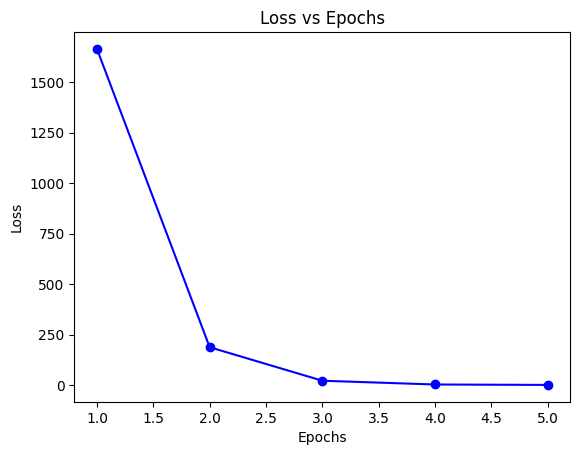

In [92]:
# YOUR CODE HERE
learning_rate = 0.0002
num_epochs = 5

# Perform gradient descent on the training data
weights, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)

# Plotting the loss vs. epoch
plt.plot(range(1, num_epochs + 1), losses, marker='o', color='blue')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

Epoch 1/5: Weights = [1.01418788 1.66525772], Loss = 1665.3666608648086
Epoch 2/5: Weights = [1.01895194 1.88825083], Loss = 187.40513955606463
Epoch 3/5: Weights = [1.02055715 1.96299757], Loss = 21.344447859595864
Epoch 4/5: Weights = [1.02110352 1.98805237], Loss = 2.686212284426659
Epoch 5/5: Weights = [1.02129496 1.99645053], Loss = 0.5898109426970056
Epoch 1/5: Weights = [ 2.41878839 67.5257721 ], Loss = 1665.3666608648086
Epoch 2/5: Weights = [  -90.4006607  -4288.59461095], Loss = 7139122.1589806825
Epoch 3/5: Weights = [  5987.51452476 280950.89027965], Loss = 30610071189.148193
Epoch 4/5: Weights = [  -391995.3005066  -18396577.98716515], Loss = 131245337997012.45
Epoch 5/5: Weights = [2.56679857e+07 1.20461112e+09], Loss = 5.6273435758094995e+17
Epoch 1/10: Weights = [1.01418788 1.66525772], Loss = 1665.3666608648086
Epoch 2/10: Weights = [1.01895194 1.88825083], Loss = 187.40513955606463
Epoch 3/10: Weights = [1.02055715 1.96299757], Loss = 21.344447859595864
Epoch 4/10: We

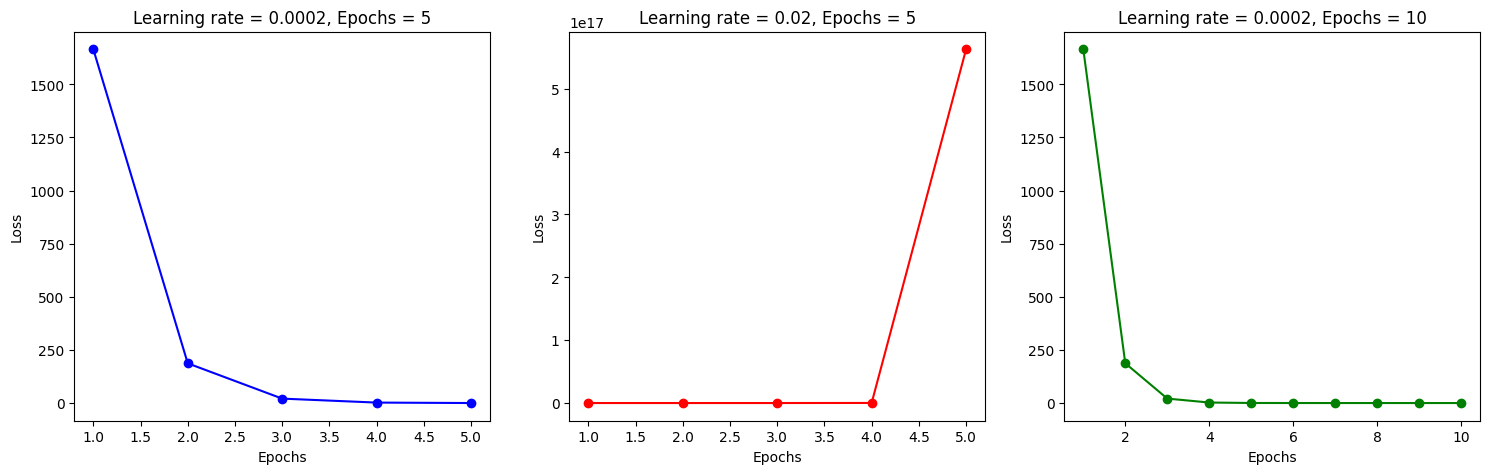

Final loss for learning_rate=0.0002, num_epochs=5: 0.5898109426970056
Final loss for learning_rate=0.02, num_epochs=5: 5.6273435758094995e+17
Final loss for learning_rate=0.0002, num_epochs=10: 0.3244489580924435


In [31]:
# YOUR CODE HERE
# Function to run gradient descent with specified hyperparameters
def run_gradient_descent(learning_rate, num_epochs):
    weights, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)
    return losses

# Run gradient descent with the three specified hyperparameter settings
losses_1 = run_gradient_descent(learning_rate=0.0002, num_epochs=5)   # Case 1
losses_2 = run_gradient_descent(learning_rate=0.02, num_epochs=5)     # Case 2
losses_3 = run_gradient_descent(learning_rate=0.0002, num_epochs=10)  # Case 3

# Plot side-by-side subplots to compare the losses
plt.figure(figsize=(15, 5))

# Plot for learning_rate=0.0002, num_epochs=5
plt.subplot(1, 3, 1)
plt.plot(range(1, 6), losses_1, marker='o', color='blue')
plt.title('Learning rate = 0.0002, Epochs = 5')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot for learning_rate=0.02, num_epochs=5
plt.subplot(1, 3, 2)
plt.plot(range(1, 6), losses_2, marker='o', color='red')
plt.title('Learning rate = 0.02, Epochs = 5')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot for learning_rate=0.0002, num_epochs=10
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), losses_3, marker='o', color='green')
plt.title('Learning rate = 0.0002, Epochs = 10')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Print the final loss for each scenario
print("Final loss for learning_rate=0.0002, num_epochs=5:", losses_1[-1])
print("Final loss for learning_rate=0.02, num_epochs=5:", losses_2[-1])
print("Final loss for learning_rate=0.0002, num_epochs=10:", losses_3[-1])

Conclusions:
1. If the loss for learning_rate=0.02 (Case 2) fluctuates or increases, it would indicate that the learning rate is too high, and it might not be beneficial to increase it to 0.02. If the loss stabilizes or decreases quickly, then it could be beneficial to speed up convergence.
2. If the loss in learning_rate=0.0002, num_epochs=10 (Case 3) continues to decrease compared to the 5-epoch scenario, it suggests that increasing the number of epochs can further improve model performance, given the small learning rate.

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

Given earlier observations, the most optimal model would be the one from Case 3 (learning_rate=0.0002, num_epochs=10). This model allows the gradient descent to steadily minimize the loss over more epochs while maintaining stability.

In [35]:
# YOUR ANSWER HERE
# The final learned weights after 10 epochs
final_weights = weights[-1]  # Take the weights from the last epoch

# Extract the bias (W_0) and the coefficient for the feature (W_1)
W_0 = final_weights[0]  # Intercept (bias term)
W_1 = final_weights[1]  # Coefficient (slope)

# Define the learned model M_3(x)
def M_3(x):
    return W_0 + W_1 * x

---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [36]:
# YOUR CODE HERE
# Define the three models
def M_1(x):
    return 5 + x

def M_2(x):
    return 1 + 2 * x

# Predictions for M1 and M2 using X_train (second column of X_train as feature values)
M1_hat_train = M_1(X_train[:, 1])
M2_hat_train = M_2(X_train[:, 1])

# Predictions for M3 using the final learned model (already defined in the previous section)
M3_hat_train = M_3(X_train[:, 1])

# Compute MSE for each model
mse_M1 = mean_squared_error(Y_train, M1_hat_train)
mse_M2 = mean_squared_error(Y_train, M2_hat_train)
mse_M3 = mean_squared_error(Y_train, M3_hat_train)

# Print the MSE for each model
print(f"MSE for M_1(x) = 5 + x: {mse_M1}")
print(f"MSE for M_2(x) = 1 + 2x: {mse_M2}")
print(f"MSE for M_3(x) (Learned model): {mse_M3}")

MSE for M_1(x) = 5 + x: 1397.608983658733
MSE for M_2(x) = 1 + 2x: 0.3280557752885262
MSE for M_3(x) (Learned model): 0.5898109426970056


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

Answer.

M_3(x), the learned model, was trained to minimize the MSE on the training data, so it likely has the lowest training error. However, since M_3(x) was specifically optimized for the training data, there's a chance it might overfit, depending on how complex the model is compared to the underlying data pattern.

Given the trade-offs and the risk of overfitting with M_3(x), M_2(x) is the model that I would choose for better generalization ability. It provides a good fit to the data while maintaining simplicity, which typically leads to more robust performance on unseen data.

----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

Answer 1. 

The primary difference between Stochastic Gradient Descent (SGD) and Gradient Descent (GD) lies in how the gradient is computed and how frequently the model's weights are updated.

In GD, the gradient of the loss function is computed using the entire training dataset. This means that after calculating the loss and gradient for all training examples, the weights are updated only once per epoch.

In SGD, the gradient of the loss function is computed for each training example, and the weights are updated after each individual example. This means that the model’s weights are updated much more frequently.

Answer 2.

In general, SGD often converges faster than full-batch Gradient Descent because it updates the weights after each example rather than waiting to process the entire dataset.

Epoch 1/5, Loss: 1.0459734812041679, Weights: [1.03152057 2.02131804]
Epoch 2/5, Loss: 0.40876395855443715, Weights: [1.03181604 1.99331185]
Epoch 3/5, Loss: 0.3430795255737808, Weights: [1.03216664 2.00386144]
Epoch 4/5, Loss: 0.3999388520734878, Weights: [1.03262004 2.00721632]
Epoch 5/5, Loss: 0.5380829469724316, Weights: [1.03320106 2.01179177]


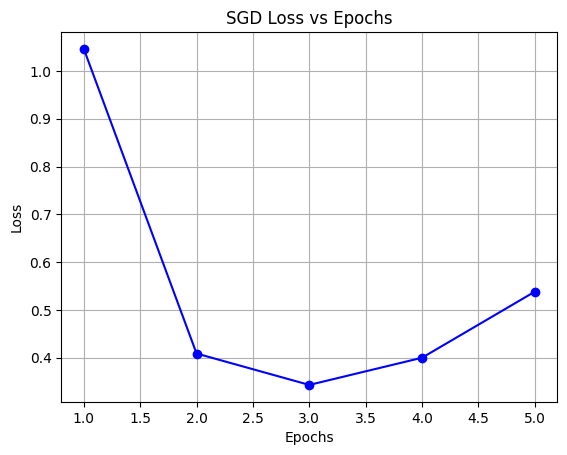

Final weights after SGD: [1.03320106 2.01179177]


In [38]:
# YOUR ANSWER HERE
import numpy as np
from sklearn.metrics import mean_squared_error

def stochastic_gradient_descent(inputs, outputs, learning_rate, num_epochs):
    """Apply the stochastic gradient descent algorithm to learn linear regression.

    Args:
        inputs: A 2-D array where each column is an input feature and each row is a training example.
        outputs: A 1-D array containing the real-valued label corresponding to the input data in the same row.
        learning_rate: The learning rate to use for updates.
        num_epochs: The number of passes through the full training data.

    Returns:
        W: The learned weights after training.
        losses: A list with the loss after each epoch.
    """
    # Initialize weights to 1s
    m, n = inputs.shape
    W = np.ones(n)

    # Track the loss at each epoch
    losses = []
    
    # Perform SGD for the specified number of epochs
    for epoch in range(num_epochs):
        # Shuffle the training data to improve convergence
        indices = np.random.permutation(m)
        inputs = inputs[indices]
        outputs = outputs[indices]

        for i in range(m):
            xi = inputs[i:i+1]  # Single training example (1 row)
            yi = outputs[i]     # Corresponding label
            
            # Make prediction for xi using current weights
            prediction = np.dot(xi, W)
            
            # Compute the error
            error = prediction - yi
            
            # Update the weights (W = W - learning_rate * gradient)
            W = W - learning_rate * (2 * error * xi[0])
        
        # Compute and store the MSE loss for the current epoch
        predictions = np.dot(inputs, W)
        loss = mean_squared_error(outputs, predictions)
        losses.append(loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss}, Weights: {W}")
    
    return W, losses

# Set the learning rate and number of epochs
learning_rate = 0.0002
num_epochs = 5

# Perform SGD on the training data
sgd_weights, sgd_losses = stochastic_gradient_descent(X_train, Y_train, learning_rate, num_epochs)

# Plot the loss over epochs for SGD
plt.plot(range(1, num_epochs + 1), sgd_losses, marker='o', color='blue')
plt.title('SGD Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Print final weights and MSE after SGD
print(f"Final weights after SGD: {sgd_weights}")


Explanation:

Shuffling the data: Before each epoch, the data is shuffled to prevent patterns in the data from affecting the learning process. This helps with convergence.

Updating weights: For each individual example, we compute the prediction, calculate the error, and then update the weights immediately.

Tracking the loss: After processing all examples in an epoch, we compute the mean squared error (MSE) and store it for visualization.